<h1><p style="text-align: center;">Data Analysis with Python <br></p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, there is a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. I will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('weather.csv')

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.shape

(8022, 26)

In [4]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


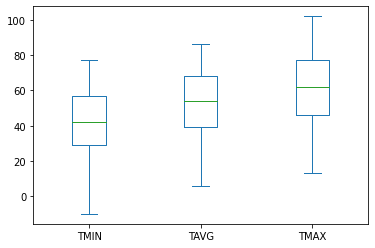

In [5]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

plt.show()

In [6]:
weather["TMIN"]

0       28.0
1       24.0
2       27.0
3       40.0
4       31.0
        ... 
8017    44.0
8018    30.0
8019    28.0
8020    27.0
8021    35.0
Name: TMIN, Length: 8022, dtype: float64

In [7]:
weather["TMAX"]

0       47.0
1       52.0
2       48.0
3       54.0
4       44.0
        ... 
8017    61.0
8018    44.0
8019    40.0
8020    35.0
8021    50.0
Name: TMAX, Length: 8022, dtype: float64

In [8]:
weather["TAVG"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8017    51.0
8018    40.0
8019    33.0
8020    30.0
8021    39.0
Name: TAVG, Length: 8022, dtype: float64

## Plotting the temperature difference

In [9]:
weather["TMAX"] - weather["TMIN"]

0       19.0
1       28.0
2       21.0
3       14.0
4       13.0
        ... 
8017    17.0
8018    14.0
8019    12.0
8020     8.0
8021    15.0
Length: 8022, dtype: float64

In [11]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [12]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

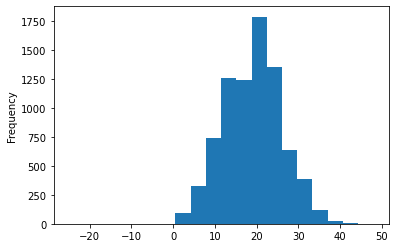

In [13]:
weather.TDIFF.plot(kind = "hist", bins = 20)

plt.show()

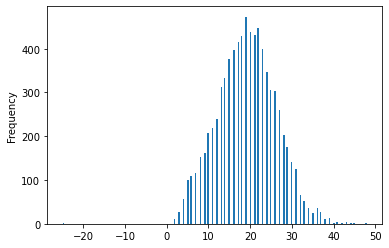

In [14]:
weather.TDIFF.plot(kind = "hist", bins = 200)

plt.show()

In [15]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

Now, I will check the ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

In [16]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [17]:
WT=weather.loc[:, "WT01": "WT22"]

In [18]:
# WT = weather.iloc[:,6:26]    


In [19]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
weather["bad_conditions"] = WT.sum(axis = "columns")

In [21]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0


In [22]:
weather.sample(n = 5)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
561,USC00379423,2006-07-20,NaN,NaN,82.0,61.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
6503,USW00014765,2011-11-04,12.30,NaN,51.0,36.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,2.0
6089,USW00014765,2010-09-16,10.07,NaN,69.0,48.0,1.0,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,21.0,5.0
4029,USW00014765,2005-01-25,8.72,21.0,27.0,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.0,1.0
3144,USC00379423,2013-09-04,NaN,NaN,80.0,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0


In [23]:
weather['bad_conditions'] = weather.bad_conditions.fillna(value = 0)

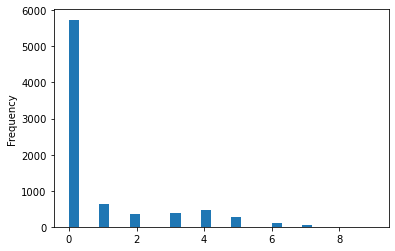

In [24]:
weather.bad_conditions.plot(kind = "hist", bins = 30)

plt.show()

In [25]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

Now I'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

In [26]:
weather.bad_conditions.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [27]:
mapping = {0 : "good", 1 : "bad", 2 : "bad", 3 : "bad", 4 : "bad", 5 : "worse", 6 : "worse", 7 :  "worse", 8 :  "worse", 9 :  "worse" }

In [28]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [29]:
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

In [30]:
weather.rating[0]

'good'

In [31]:
type(weather.rating[0])

str

In [ ]:
# WT.rating = WT.rating.astype('category')

In [32]:
categ = ["good", "bad", "worse"]

In [33]:
weather["rating"] = pd.Categorical(weather.rating, categories = categ, ordered=True )

In [34]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

Before starting this part of this chapter it has to be repeated the steps which it has done in the first chapter for preparing the ``ri`` data.

In [35]:
import pandas as pd
ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

C:\Users\erdem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
ri.reset_index(inplace = True)

In [37]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [38]:
weather_rating = weather[["DATE", "rating"]]

In [39]:
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


***

## Merging the DataFrames

In [40]:
ri.shape

(48010, 23)

In [41]:
ri_weather = pd.merge(left = ri, right = weather_rating, left_on = "stop_date", right_on = "DATE", how = "left")

In [42]:
ri_weather.shape

(95877, 25)

In [43]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good


***

## Comparing arrest rates by weather rating

In [44]:
ri_weather.is_arrested.mean()

0.05181638974936638

In [45]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [46]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

In [47]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In [48]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [49]:
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64